# Part I - Prosper Loan Data Exploration
## by Akhila


## Preliminary Wrangling


In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [43]:
# load in the dataset into a apndas dataframe, print statistics
loandata = pd.read_csv('prosperLoanData.csv')


In [44]:
# high  level overview of the data shape and composition
print(loandata.shape)
print(loandata.dtypes)
print(loandata.head(10))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [45]:
# creating the categorical variables needed for the graphs
ordinal_var_dict = {'CreditGrade': ['A','B','C','D','E'],
                    'LoanStatus': ['Current','Completed','Chargeoff','Cancelled','Defaulted','FinalPaymentInProgress']}
                    

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loandata[var] = loandata[var].astype(ordered_var)

In [46]:
#Looking at what the data looks like
loandata.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,NaN,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [47]:
#descriptive statistics for numeric variables
print(loandata.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### What is the structure of your dataset?

> There is 113938 loans in this data set. There are 20 features this includes (Listing Number, Term, Borrower APR, Borrower Rate, Lender Yield, Estimated Effective Yield, Estimated Loss, Estimated Return, Prosper Rating (numeric), proper score, Service Fees, Collection Fees, Gross Principal Loss, Net Principal Loss, Non Principal Recovery payments, percent Funded, Recommendations, Investment From Friends Count, Investment From Friends Amount, Investors)

> All of the values are numeric.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the estimated loss vs the estimated return.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that borrowerAPR and borrowRate will have the biggest effect.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### How many of each type of loanstatus are there?


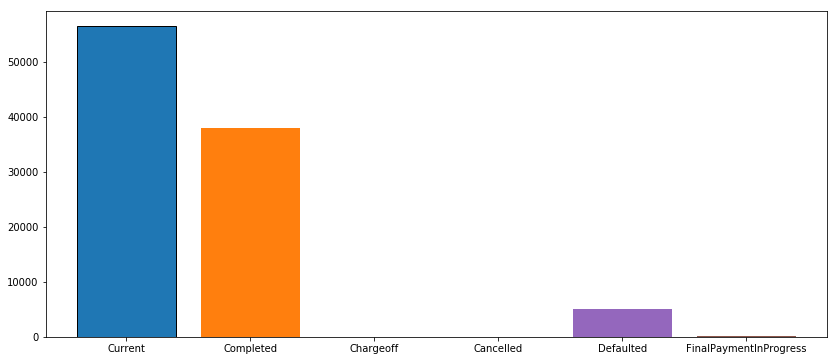

In [48]:


loandata['LoanStatus'].value_counts().sort_index().plot.bar(edgecolor='black',figsize=[14,6],rot=0,width=0.8);

### Observation
#### it looks like the top three categories are completed, current, and final payment in progress.

### What is the distribution of estimated Loss


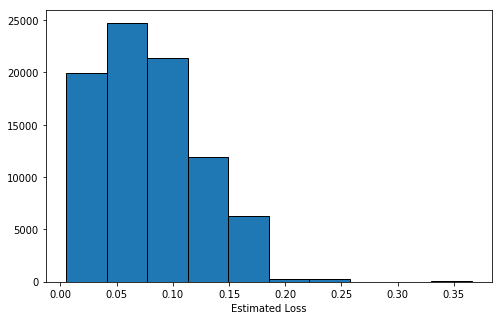

In [49]:

# drop na
data=loandata.dropna(subset=['EstimatedLoss']).copy()

# start with a standard-scaled plot
binsize = 500
bins = np.arange (0, data['EstimatedLoss'].max ()+binsize, binsize)
plt.figure(figsize= [8,5])
plt.hist(data=data, x='EstimatedLoss', edgecolor='black') 
plt.xlabel ('Estimated Loss') 
plt.show ()

### Observation

#### The highest count of estimated loss is between 0.05 to 0.10

### What is the distribution of estimated return


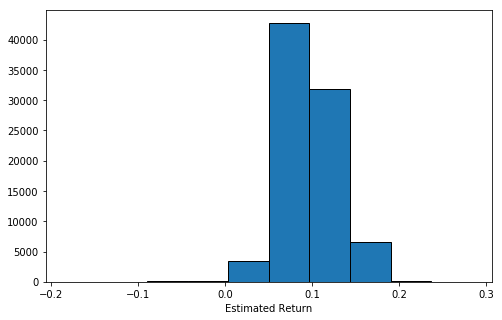

In [50]:
#plot estimated return EstimatedReturn

rdata=loandata.dropna(subset=['EstimatedReturn']).copy()

# start with a standard-scaled plot
binsize = 500
bins = np.arange (0, rdata['EstimatedReturn'].max ()+binsize, binsize)
plt.figure(figsize= [8,5])
plt.hist(data=rdata, x='EstimatedReturn', edgecolor='black') 
plt.xlabel ('Estimated Return') 
plt.show ()

### Observation
#### The estimated return highest is between 0.05 and 0.10 as well

### What is the distribution of borrower rate

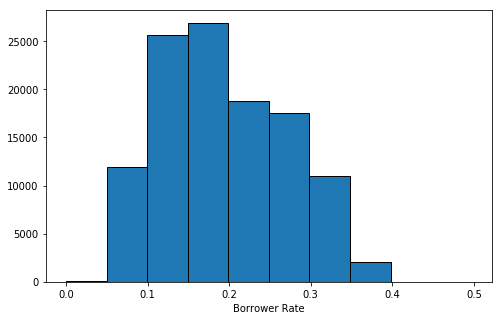

In [51]:
# plotting the borrower rate BorrowerRate

bdata=loandata.dropna(subset=['BorrowerRate']).copy()

# start with a standard-scaled plot
binsize = 500
bins = np.arange (0, bdata['BorrowerRate'].max ()+binsize, binsize)
plt.figure(figsize= [8,5])
plt.hist(data=bdata, x='BorrowerRate', edgecolor='black') 
plt.xlabel ('Borrower Rate') 
plt.show ()

### Observation
#### the highest borrower rate is between 0.15 and 0.2

### What is the distrbution of Borrower APR

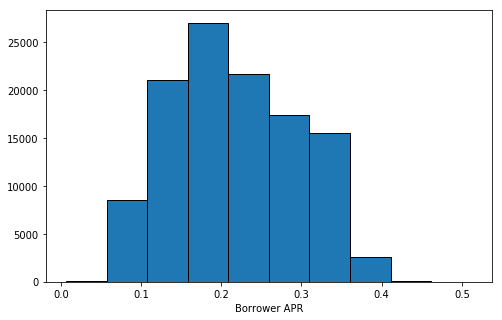

In [52]:
#plot the borrowere APR BorrowerAPR

adata=loandata.dropna(subset=['BorrowerAPR']).copy()

# start with a standard-scaled plot
binsize = 500
bins = np.arange (0, adata['BorrowerAPR'].max ()+binsize, binsize)
plt.figure(figsize= [8,5])
plt.hist(data=adata, x='BorrowerAPR', edgecolor='black') 
plt.xlabel ('Borrower APR') 
plt.show ()

### the highest borrower APR is also between 0.15 and 0.2

### What do all of these plots look like together

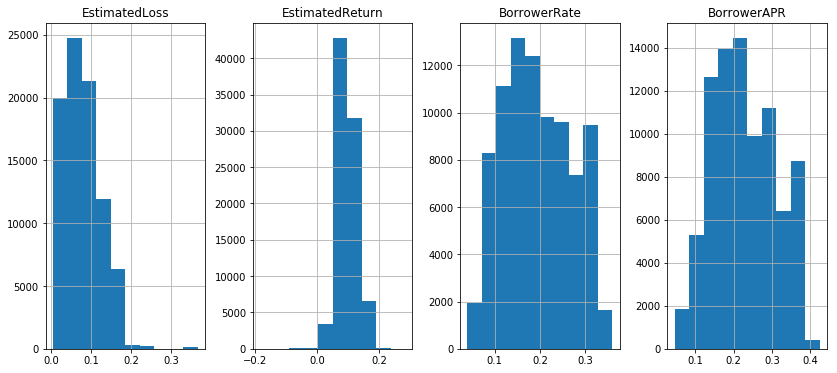

In [53]:

# let's plot all four together to get an idea of each ordinal variable's distribution

fig, axes = plt.subplots(1, 4, figsize = [14,6])
data.hist('EstimatedLoss', ax=axes[0])
data.hist('EstimatedReturn', ax=axes[1])
data.hist('BorrowerRate', ax=axes[2])
data.hist('BorrowerAPR', ax=axes[3])
plt.show()

#### estimated loss is skewed right and esetimated return is skewed left while borrower rate and apr are evenly distributed. 

In [54]:
#Lets look for outliers in the data
#low outliers

low_outliers = (data['EstimatedLoss'] < 0.05) | (data['EstimatedReturn'] < 0.05) | (data['BorrowerRate'] < 0.05)

print(low_outliers.sum())
print(data.loc[low_outliers,:])

26687
                     ListingKey  ListingNumber            ListingCreationDate  \
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
8       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
13      0F1C3583260311305D68F87         840820  2013-07-15 16:28:28.087000000   
14      0F353575943675863D1AFC0         757359  2013-04-19 11:17:41.700000000   
18      0FF2357105361877390B58D         716058  2013-02-20 03:48:37.470000000   
20      101635959323992333B3C70        1011916  2013-11-22 11:35:02.987000000   
27      0F5034867864161084F3789         463083  2010-06-16 16:23:44.533000000   
29      0F563597161095613517437        1051243  2013-12-17 09:18:33.220000000   
30      0F573539047719

In [55]:
#What are the high outliers in the data
# high outliers

high_outliers = (data['EstimatedLoss'] < 0.15) | (data['EstimatedReturn'] < 0.15) | (data['BorrowerRate'] < 0.35)

print(high_outliers.sum())
print(data.loc[high_outliers,:])

84853
                     ListingKey  ListingNumber            ListingCreationDate  \
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7       0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
10      0F123545674891886D9F106         587746  2012-05-10 07:04:01.577000000   
12      0F1A3597143888805163EF7        1081604  2013-12-15 20:01:10.757000000   
13      0F1C3583260311305D68F87         840820  2013-07-15 16:28:28.087000000   
14      0F353575943675

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the distrbution was around the 0 to 0.1 or 0.2 points. This tells us that the estiimated return and the estimated loss numbers are relatively low. The borrower rate is also fairly low between 0 and 0.3. Where the average borrower rate would be around 10%. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the distributions are fairly evenly distributed with one of being more skewed to the left and the other one being more skewed to the right. I did have to clean the data for any NaN values as it was messing with the graphs.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [56]:
#setting the numeric and categorical variables
numeric_vars = ['EstimatedLoss', 'EstimatedReturn', 'BorrowerRate']
categoric_vars = ['LoanStatus']

### How do the numeric variables correlated with each other


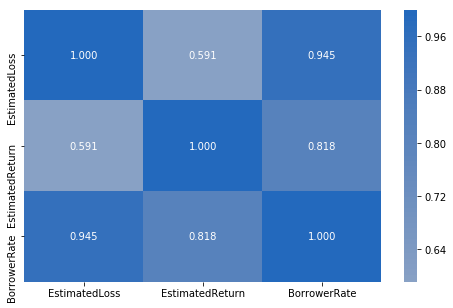

In [57]:
#correlation plot

plt.figure(figsize = [8, 5])
sb.heatmap(data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### the highest correlation is between 0.945 and 1.00

### What do the numeric variables look like against the categorical ones?

data.shape= (84853, 81)
data_samp.shape= (500, 81)


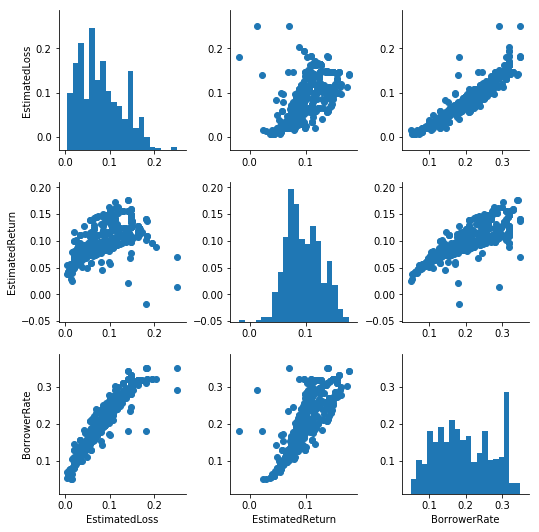

In [58]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
print("data.shape=",data.shape)
data_samp = data.sample(n=500, replace = False)
print("data_samp.shape=",data_samp.shape)

g = sb.PairGrid(data = data_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

#### We can see that there is a positive correlation between estimated loss and borrower rate and estimated return and borrower rate

### What do the numeric features look like against the categorical features

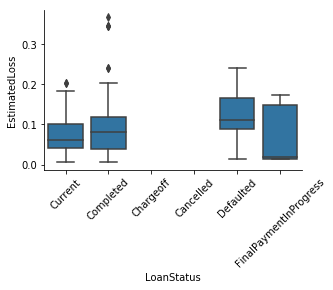

In [59]:
# plot matrix of numeric features against categorical features.

data_samp = data.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = data_samp, y_vars = ['EstimatedLoss'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)

plt.xticks(rotation=45)
plt.show();

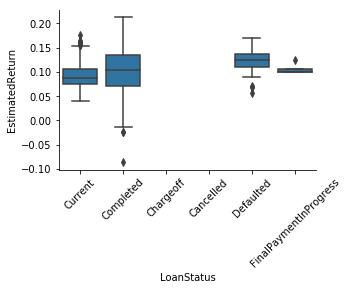

In [60]:
data_samp = data.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = data_samp, y_vars = ['EstimatedReturn'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)

plt.xticks(rotation=45)
plt.show();

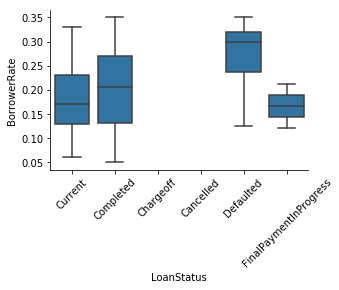

In [61]:
#PLot the borrower Rate
data_samp = data.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = data_samp, y_vars = ['BorrowerRate'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)

plt.xticks(rotation=45)
plt.show();

#### Estimated loss completed has the most high outliers
#### Estimated return completed has the most low outliers
#### Borrower rate has no outliers

In [62]:
# compute the logarithm of LP_netprincipalLoss

def log_trans(x, inverse = False):
    if not inverse:
        return np.log(x)
    else:
        return np.power(10,x)

data['log_EstimatedLoss'] = data['EstimatedLoss'].apply(log_trans)
data['log_EstimatedReturn'] = data['EstimatedReturn'].apply(log_trans)

In [63]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3


### What does the estimated return vs estimated loss look like?

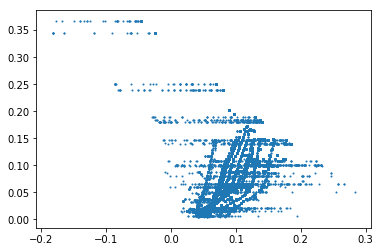

In [64]:
#Scatter plot to show the estimated return vs the estimated loss
plt.scatter(data=data, x='EstimatedReturn', y = 'EstimatedLoss',s = 1);

#### there seems to be no clear relationship between return and loss

### What does the borrower rate vs estimated loss look like?

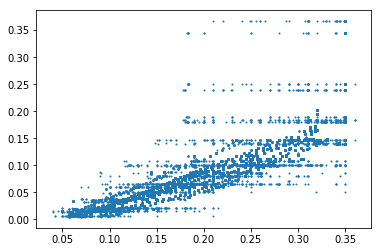

In [65]:
# scatter plot to show the borrower rate vs the estimated loss
plt.scatter(data=data, x='BorrowerRate', y = 'EstimatedLoss',s = 1);

#### There is a positive relationship between borrowerrate and estimated loss

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The estimated loss had a medium correlation to estimated return and  a high correlation with the borrower rate. I expected the high correlation between the borrower rate and the estimated loss because I assumed that the borrower rate would be higher for clients who have a higher estimated loss. Usually interest rates are higher for people who are seen as a greater risk. I expected estimated loss and estimated return to have an inverse correlation as they seemed to be inversely related. But as the graph shows they do have some correlation. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a positive relationship between Estimated Return and borrower rate.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [66]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(-.2, .29+0.025, .025)
    bins_y = np.arange(0.1, 0.4+0.025, 0.025)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)


### What does estimated loss and return based on loan status look like?

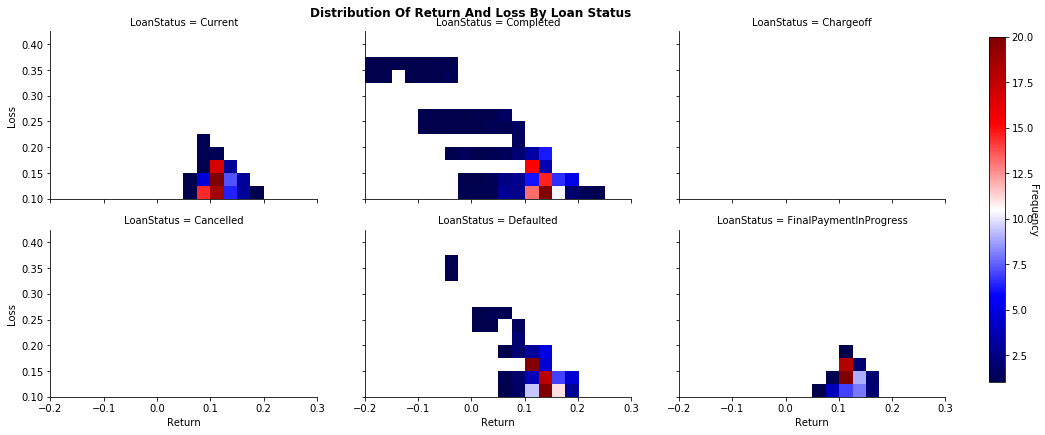

In [67]:
# create faceted heat maps on estimated loss and return based on loan status
g = sb.FacetGrid(data = data, col = 'LoanStatus', col_wrap = 3, size = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'EstimatedReturn', 'EstimatedLoss', color = 'seismic')
g.set_xlabels('Return')
g.set_ylabels('Loss')

# create a 'subplot' for the colorbar
cbar_ax = g.fig.add_axes([1.015,0.13,0.015,0.8])
# create color bar, place it in the 'subplot'
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label('Frequency',rotation=270)

# IF a visualization has subplots, add a MAIN title 
plt.suptitle("Distribution of return and loss by loan status".title(), y=1, fontsize=12, weight = 'bold')

## Set plot Dimensions -Figure Level
g.fig.set_size_inches(14,6);

plt.show()

#### completed current and past due have the most correlation

### What does estimated loss and borrower rate based on loan status look like?

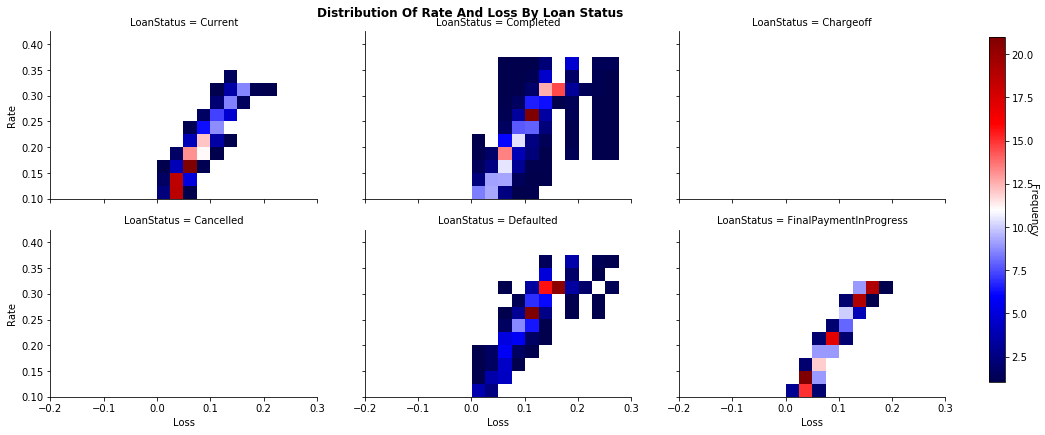

In [68]:
# create faceted heat maps on estimated loss and borrower rate based on loan status
g = sb.FacetGrid(data = data, col = 'LoanStatus', col_wrap = 3, size = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'EstimatedLoss', 'BorrowerRate', color = 'seismic')
g.set_xlabels('Loss')
g.set_ylabels('Rate')

# create a 'subplot' for the colorbar
cbar_ax = g.fig.add_axes([1.015,0.13,0.015,0.8])
# create color bar, place it in the 'subplot'
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label('Frequency',rotation=270)

# IF a visualization has subplots, add a MAIN title 
plt.suptitle("Distribution of rate and loss by loan status".title(), y=1, fontsize=12, weight = 'bold')

## Set plot Dimensions -Figure Level
g.fig.set_size_inches(14,6);

plt.show()

#### Final payment progress and past due have the highest correlation

### What does estimated return and borrower rate based on loan status look like?

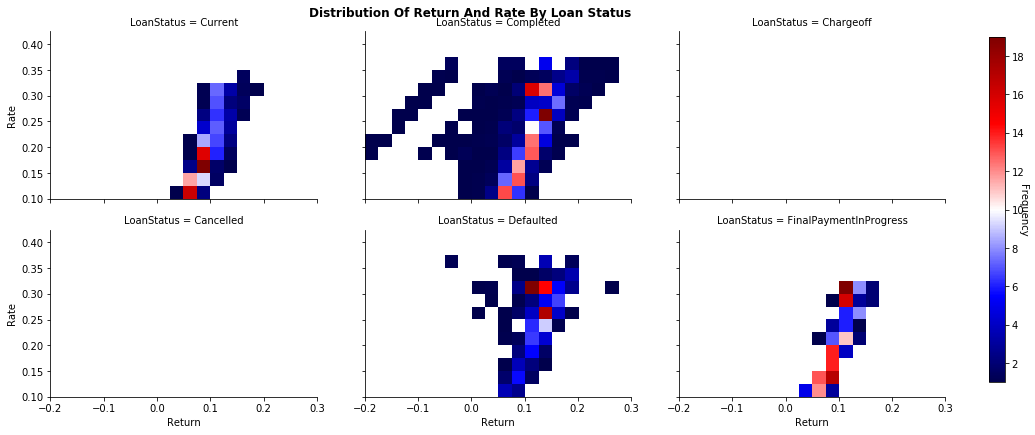

In [69]:
# create faceted heat maps on estimated return and borrower rate based on loan status
g = sb.FacetGrid(data = data, col = 'LoanStatus', col_wrap = 3, size = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'EstimatedReturn', 'BorrowerRate', color = 'seismic')
g.set_xlabels('Return')
g.set_ylabels('Rate')

# create a 'subplot' for the colorbar
cbar_ax = g.fig.add_axes([1.015,0.13,0.015,0.8])
# create color bar, place it in the 'subplot'
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label('Frequency',rotation=270)

# IF a visualization has subplots, add a MAIN title 
plt.suptitle("Distribution of return and rate by loan status".title(), y=1, fontsize=12, weight = 'bold')

## Set plot Dimensions -Figure Level
g.fig.set_size_inches(14,6);

plt.show()

#### final payment in progress has the highest correlation

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes there were features that strengthen each other. The borrower rate and the estimated return had this relationship with each other. 

### Were there any interesting or surprising interactions between features?

> Looking at the point plots, it dows not seem like there is a systematic interaction effect between the ffeatures. 

## Conclusions
> the estimated return and the estimated loss numbers are relatively low. The borrower rate is also fairly low between 0 and 0.3. Where the average borrower rate would be around 10%.  Most of the distributions are fairly evenly distributed with one of being more skewed to the left and the other one being more skewed to the right.  Usually interest rates are higher for people who are seen as a greater risk. I expected estimated loss and estimated return to have an inverse correlation as they seemed to be inversely related. But as the graph shows they do have some correlation. 

